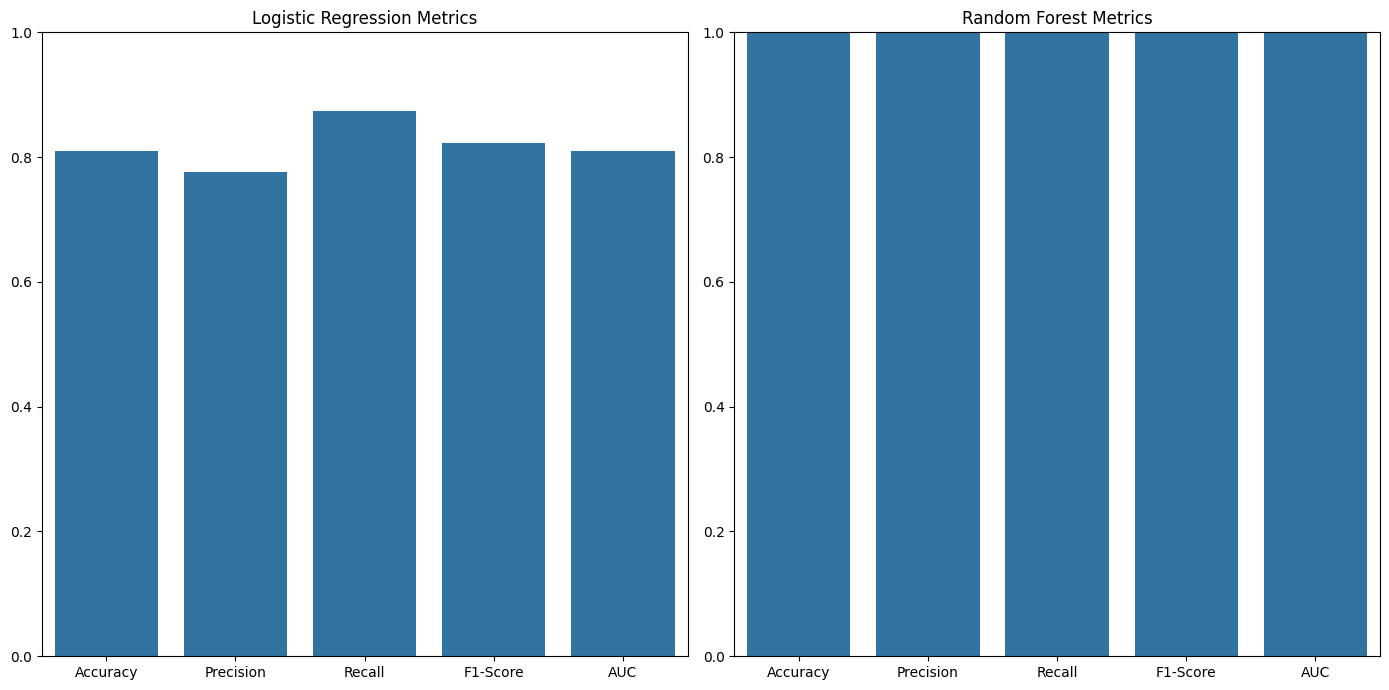

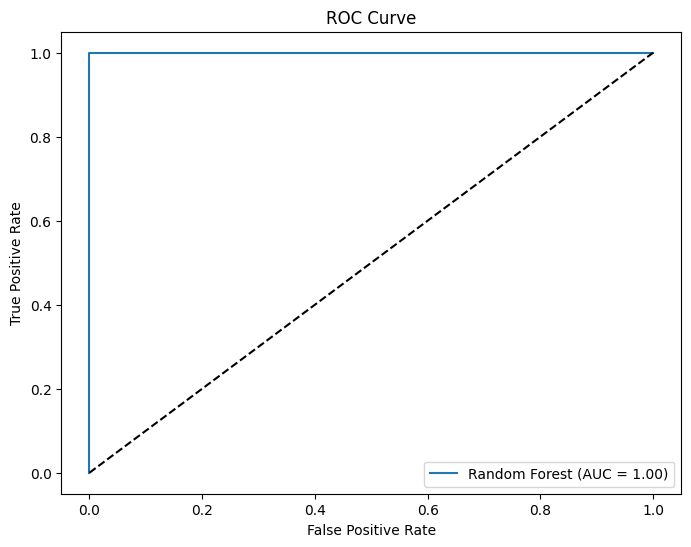

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/heart.csv'
heart_data = pd.read_csv(file_path)

# Data Preprocessing
# Separate the features and target variable
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# One-hot encode categorical variables if necessary (e.g., 'cp', 'restecg', 'slope', 'thal', 'ca')
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal', 'ca'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Implementation
# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, auc

# Evaluate Logistic Regression
accuracy_log, precision_log, recall_log, f1_log, auc_log = evaluate_model(y_test, y_pred_log_reg)

# Evaluate Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf, auc_rf = evaluate_model(y_test, y_pred_rf)

# Plotting Evaluation Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
log_values = [accuracy_log, precision_log, recall_log, f1_log, auc_log]
rf_values = [accuracy_rf, precision_rf, recall_rf, f1_rf, auc_rf]

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=metrics, y=log_values)
plt.title('Logistic Regression Metrics')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(x=metrics, y=rf_values)
plt.title('Random Forest Metrics')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# ROC Curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Save the results for documentation
results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_log, accuracy_rf],
    'Precision': [precision_log, precision_rf],
    'Recall': [recall_log, recall_rf],
    'F1-Score': [f1_log, f1_rf],
    'AUC': [auc_log, auc_rf]
}

results_df = pd.DataFrame(results)
results_df.to_csv('data/model_evaluation_results.csv', index=False)
